**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self._X_train = X.astype(float)
        self._y_train = y
        self._n_classes = 1 + np.max(y)
        if self.algorithm == 'kd_tree':
            self._tree = KDTree(self._X_train)

    def _predict(self, X):
        X = X.astype(float)
        X_train_sq = np.sum(self._X_train**2, axis=1).reshape(1, -1)
        X_pred_sq = np.sum(X**2, axis=1).reshape(-1, 1)
        dist = np.sqrt(
            X_pred_sq-2*np.matmul(X, self._X_train.T)+X_train_sq
        )
        return dist

    def _count(self, arr):
        return (
            np.unique(
                np.concatenate((np.arange(self._n_classes), arr)),
                return_counts=True
            )[1] - 1
        ) / self.n_neighbors

    def _count_neigh_el(self, X):
        if self.algorithm == 'brute':
            dist = self._predict(X)
            neigh_ind = np.argpartition(
                                        dist, self.n_neighbors
                                        )[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            dist, neigh_ind = self._tree.query(X, k=self.n_neighbors)
        return self._y_train[neigh_ind].astype('int64')

    def predict(self, X):
        neigh_el = self._count_neigh_el(X)
        return np.apply_along_axis(
            lambda x: np.bincount(x).argmax(), 1, neigh_el
        )

    def predict_proba(self, X):
        return np.apply_along_axis(
            lambda x: self._count(x),
            1,
            self._count_neigh_el(X)
            )

    def score(self, X, y):
        return np.average(y == self.predict(X))

**IRIS**

In [49]:
iris = datasets.load_iris()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [51]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [52]:
%time clf.fit(X_train, y_train)

CPU times: user 1.21 ms, sys: 445 µs, total: 1.66 ms
Wall time: 1.24 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [53]:
%time my_clf.fit(X_train, y_train)

CPU times: user 89 µs, sys: 41 µs, total: 130 µs
Wall time: 309 µs


In [54]:
%time clf.predict(X_test)

CPU times: user 1.19 ms, sys: 192 µs, total: 1.38 ms
Wall time: 1.18 ms


array([1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0])

In [55]:
%time my_clf.predict(X_test)

CPU times: user 1.09 ms, sys: 487 µs, total: 1.58 ms
Wall time: 1.12 ms


array([1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0])

In [56]:
%time clf.predict_proba(X_test)

CPU times: user 1.47 ms, sys: 352 µs, total: 1.83 ms
Wall time: 1.54 ms


array([[ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ]])

In [57]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.09 ms, sys: 2.58 ms, total: 6.66 ms
Wall time: 4.22 ms


array([[ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ]])

In [58]:
clf.score(X_test, y_test)

0.93333333333333335

In [59]:
my_clf.score(X_test, y_test)

0.93333333333333335

Задание 3

In [14]:
#%%pycodestyle
results = []
n_loops = 1000
for i in range(1,30):
    result = []
    for j in range(n_loops):
        X_train, X_test, y_train, y_test = (
            train_test_split(
                iris.data, iris.target, test_size=0.1, stratify=iris.target
            )
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        result.append(my_clf.score(X_test, y_test))
    results.append(np.mean(result))
results = np.array(results)

/Users/kosov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt


In [15]:
opt_neigh = results.argmax()+1
opt_neigh

13

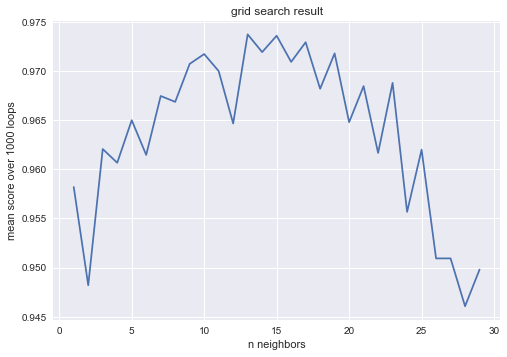

In [16]:
plt.plot(range(1,30), results)
plt.xlabel("n neighbors")
plt.ylabel("mean score over {} loops".format(n_loops))
plt.title("grid search result")
plt.show()

**MNIST**

In [17]:
mnist = fetch_mldata('MNIST original')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [20]:
%time clf.fit(X_train, y_train)

CPU times: user 41.9 s, sys: 644 ms, total: 42.6 s
Wall time: 43.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

CPU times: user 158 ms, sys: 167 ms, total: 325 ms
Wall time: 324 ms


In [22]:
%time clf.predict(X_test)

CPU times: user 1min 11s, sys: 436 ms, total: 1min 11s
Wall time: 1min 12s


array([ 4.,  4.,  8.,  6.,  6.,  9.,  1.,  4.,  2.,  9.,  4.,  0.,  5.,
        8.,  2.,  4.,  7.,  6.,  5.,  0.,  4.,  7.,  3.,  6.,  5.,  7.,
        8.,  1.,  2.,  8.,  9.,  8.,  4.,  4.,  3.,  6.,  2.,  8.,  4.,
        1.,  0.,  5.,  3.,  6.,  9.,  1.,  3.,  5.,  3.,  3.,  2.,  3.,
        8.,  1.,  5.,  9.,  5.,  4.,  7.,  9.,  9.,  1.,  7.,  8.,  9.,
        0.,  6.,  3.,  2.,  8.,  9.,  7.,  8.,  0.,  8.,  0.,  6.,  8.,
        4.,  5.,  7.,  9.,  1.,  4.,  0.,  1.,  0.,  1.,  2.,  9.,  0.,
        9.,  7.,  4.,  8.,  3.,  7.,  7.,  1.,  2.,  5.,  1.,  3.,  4.,
        3.,  2.,  2.,  2.,  7.,  2.,  3.,  3.,  4.,  6.,  7.,  1.,  2.,
        5.,  3.,  0.,  2.,  3.,  0.,  9.,  8.,  1.,  6.,  0.,  6.,  7.,
        1.,  2.,  2.,  4.,  3.,  2.,  5.,  9.,  7.,  1.,  0.,  5.,  8.,
        7.,  1.,  6.,  3.,  6.,  9.,  9.,  6.,  9.,  4.,  2.,  9.,  2.,
        9.,  2.,  4.,  7.,  2.,  5.,  0.,  2.,  1.,  0.,  8.,  8.,  0.,
        7.,  1.,  4.,  0.,  9.,  9.,  0.,  3.,  7.,  2.,  2.,  8

In [23]:
%time my_clf.predict(X_test)

CPU times: user 3.79 s, sys: 1.3 s, total: 5.09 s
Wall time: 3.76 s


array([4, 4, 8, 6, 6, 9, 1, 4, 2, 9, 4, 0, 5, 8, 2, 4, 7, 6, 5, 0, 4, 7, 3,
       6, 5, 7, 8, 1, 2, 8, 9, 8, 4, 4, 3, 6, 2, 8, 4, 1, 0, 5, 3, 6, 9, 1,
       3, 5, 3, 3, 2, 3, 8, 1, 5, 9, 5, 4, 7, 9, 9, 1, 7, 8, 9, 0, 6, 3, 2,
       8, 9, 7, 8, 0, 8, 0, 6, 8, 4, 5, 7, 9, 1, 4, 0, 1, 0, 1, 2, 9, 0, 9,
       7, 4, 8, 3, 7, 7, 1, 2, 5, 1, 3, 4, 3, 2, 2, 2, 7, 2, 3, 3, 4, 6, 7,
       1, 2, 5, 3, 0, 2, 3, 0, 9, 8, 1, 6, 0, 6, 7, 1, 2, 2, 4, 3, 2, 5, 9,
       7, 1, 0, 5, 8, 7, 1, 6, 3, 6, 9, 9, 6, 9, 4, 2, 9, 2, 9, 2, 4, 7, 2,
       5, 0, 2, 1, 0, 8, 8, 0, 7, 1, 4, 0, 9, 9, 0, 3, 7, 2, 2, 8, 0, 7, 8,
       9, 0, 9, 8, 2, 4, 3, 7, 0, 2, 6, 5, 2, 3, 6, 4, 0, 1, 1, 7, 5, 5, 3,
       2, 7, 4, 8, 6, 4, 3, 5, 7, 6, 0, 2, 5, 2, 0, 1, 7, 5, 2, 9, 2, 3, 9,
       7, 2, 4, 4, 6, 7, 0, 1, 3, 5, 3, 5, 3, 8, 1, 2, 5, 5, 6, 1, 6, 3, 9,
       9, 5, 6, 8, 2, 9, 1, 6, 2, 4, 9, 2, 6, 6, 3, 5, 7, 1, 8, 1, 8, 8, 2,
       1, 8, 6, 9, 8, 1, 7, 6, 0, 7, 0, 5, 7, 3, 3, 3, 8, 7, 5, 1, 6, 0, 3,
       7, 6,

In [24]:
%time clf.predict_proba(X_test)

CPU times: user 1min 11s, sys: 441 ms, total: 1min 11s
Wall time: 1min 12s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [25]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.9 s, sys: 1.33 s, total: 5.23 s
Wall time: 3.88 s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
clf.score(X_test, y_test)

0.96571428571428575

In [27]:
my_clf.score(X_test, y_test)

0.96571428571428575

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=opt_neigh, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=opt_neigh, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train, y_train)

CPU times: user 42 s, sys: 621 ms, total: 42.6 s
Wall time: 43 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

CPU times: user 42.2 s, sys: 574 ms, total: 42.7 s
Wall time: 43 s


In [32]:
%time clf.predict(X_test)

CPU times: user 1min 10s, sys: 228 ms, total: 1min 10s
Wall time: 1min 10s


array([ 7.,  0.,  0.,  2.,  4.,  8.,  1.,  7.,  9.,  4.,  5.,  2.,  8.,
        0.,  4.,  1.,  6.,  0.,  7.,  5.,  6.,  5.,  8.,  4.,  4.,  7.,
        5.,  2.,  0.,  0.,  0.,  5.,  8.,  2.,  9.,  6.,  1.,  2.,  4.,
        8.,  6.,  5.,  7.,  2.,  9.,  2.,  9.,  0.,  4.,  5.,  3.,  3.,
        6.,  0.,  3.,  8.,  5.,  5.,  6.,  6.,  0.,  6.,  9.,  8.,  8.,
        7.,  3.,  8.,  8.,  1.,  9.,  3.,  6.,  0.,  1.,  7.,  0.,  8.,
        5.,  9.,  1.,  3.,  8.,  3.,  2.,  1.,  5.,  8.,  3.,  2.,  0.,
        7.,  8.,  2.,  4.,  7.,  4.,  8.,  3.,  8.,  5.,  8.,  2.,  5.,
        0.,  8.,  5.,  1.,  9.,  1.,  3.,  7.,  5.,  7.,  0.,  2.,  2.,
        2.,  7.,  5.,  0.,  0.,  4.,  9.,  0.,  9.,  7.,  4.,  6.,  2.,
        9.,  5.,  7.,  8.,  3.,  4.,  5.,  2.,  9.,  7.,  7.,  1.,  1.,
        4.,  1.,  4.,  2.,  9.,  5.,  6.,  5.,  1.,  1.,  4.,  5.,  5.,
        7.,  6.,  1.,  1.,  9.,  2.,  1.,  0.,  7.,  4.,  5.,  3.,  1.,
        7.,  6.,  7.,  6.,  2.,  7.,  0.,  6.,  6.,  3.,  0.,  2

In [33]:
%time my_clf.predict(X_test)

CPU times: user 59.9 s, sys: 361 ms, total: 1min
Wall time: 1min


array([7, 0, 0, 2, 4, 8, 1, 7, 9, 4, 5, 2, 8, 0, 4, 1, 6, 0, 7, 5, 6, 5, 8,
       4, 4, 7, 5, 2, 0, 0, 0, 5, 8, 2, 9, 6, 1, 2, 4, 8, 6, 5, 7, 2, 9, 2,
       9, 0, 4, 5, 3, 3, 6, 0, 3, 8, 5, 5, 6, 6, 0, 6, 9, 8, 8, 7, 3, 8, 8,
       1, 9, 3, 6, 0, 1, 7, 0, 8, 5, 9, 1, 3, 8, 3, 2, 1, 5, 8, 3, 2, 0, 7,
       8, 2, 4, 7, 4, 8, 3, 8, 5, 8, 2, 5, 0, 8, 5, 1, 9, 1, 3, 7, 5, 7, 0,
       2, 2, 2, 7, 5, 0, 0, 4, 9, 0, 9, 7, 4, 6, 2, 9, 5, 7, 8, 3, 4, 5, 2,
       9, 7, 7, 1, 1, 4, 1, 4, 2, 9, 5, 6, 5, 1, 1, 4, 5, 5, 7, 6, 1, 1, 9,
       2, 1, 0, 7, 4, 5, 3, 1, 7, 6, 7, 6, 2, 7, 0, 6, 6, 3, 0, 2, 7, 4, 3,
       7, 2, 2, 2, 7, 4, 8, 3, 8, 4, 1, 6, 1, 2, 5, 3, 6, 9, 7, 7, 1, 9, 6,
       5, 1, 0, 0, 7, 2, 9, 6, 1, 7, 0, 3, 9, 6, 9, 7, 4, 3, 0, 5, 6, 0, 0,
       8, 2, 1, 0, 2, 7, 3, 8, 3, 9, 3, 4, 8, 3, 2, 9, 6, 4, 6, 6, 4, 1, 8,
       2, 7, 5, 4, 1, 0, 8, 0, 7, 9, 4, 0, 6, 6, 0, 4, 5, 7, 3, 4, 1, 0, 5,
       8, 1, 8, 3, 2, 4, 1, 9, 1, 7, 6, 5, 3, 5, 0, 1, 5, 9, 3, 3, 0, 4, 1,
       0, 4,

In [34]:
%time clf.predict_proba(X_test)

CPU times: user 1min 12s, sys: 477 ms, total: 1min 13s
Wall time: 1min 13s


array([[ 0.        ,  0.        ,  0.        , ...,  0.61538462,
         0.        ,  0.38461538],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.92307692],
       [ 0.53846154,  0.        ,  0.46153846, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min, sys: 377 ms, total: 1min
Wall time: 1min 1s


array([[ 0.        ,  0.        ,  0.        , ...,  0.61538462,
         0.        ,  0.38461538],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.92307692],
       [ 0.53846154,  0.        ,  0.46153846, ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
clf.score(X_test, y_test)

0.96999999999999997

In [37]:
my_clf.score(X_test, y_test)

0.96999999999999997

Задание 5

In [38]:
# seaborn

"""
Библиотека для визуализации данных, базирующаяся на matplotlib
"""

# matplotlib

"""
Библиотека для построения графиков
"""

# train_test_split

"""
Функция разбивающая выборку на тестовую и тренировочную
Можно указать долю разбиения и настроить рандомизацию
"""

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)

"""
Позволяет последовательно преобразовывать данные. Выход одного ставится входом другого
"""

# StandardScaler (from sklearn.preprocessing import StandardScaler)

"""
Нормирует данные
"""

# ClassifierMixin

"""
Базовый класс от которого наследуются все классификаторы
"""

# NeighborsBase

"""
Базовый класс для всех neigbors предсказателей
"""

# KNeighborsMixin

"""
Базовый класс, поиск ближайших соседей
"""

# SupervisedIntegerMixin

"""
Базовый класс для реализаций классификатора при вызове fit
"""

'\nБазовый класс для реализаций классификатора при вызове fit\n'